In [1]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import pandas as pd 
import six


In [2]:
# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = u'Hello, world!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.30000001192092896, 0.30000001192092896


In [3]:
def category_text(text):
    """Classifies content categories of the provided text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')
    
    #print(type(text.encode('utf-8')))
    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)
    
    try: 
        categories = client.classify_text(document).categories
    except:
        categories = []
    
    return categories
'''    
    #print(type(categories))
    if  type(categories) == "google.protobuf.pyext._message.RepeatedCompositeContainer" :
        for category in categories:
            print(category['name'])
'''    
    

'    \n    #print(type(categories))\n    if  type(categories) == "google.protobuf.pyext._message.RepeatedCompositeContainer" :\n        for category in categories:\n            print(category[\'name\'])\n'

In [4]:
def entities_text(text):
    """Detects entities in the text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities

    # entity types from enums.Entity.Type
    entity_type = ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')
    '''
    for entity in entities:
        print('=' * 20)
        print(u'{:<16}: {}'.format('name', entity.name))
        print(u'{:<16}: {}'.format('type', entity_type[entity.type]))
        print(u'{:<16}: {}'.format('metadata', entity.metadata))
        print(u'{:<16}: {}'.format('salience', entity.salience))
        print(u'{:<16}: {}'.format('wikipedia_url',
              entity.metadata.get('wikipedia_url', '-')))
    '''
    return entities

In [5]:
courses = pd.read_csv("../data/data.csv", engine='python')
#courses.set_index('ID', inplace=True)
courses['category'] =''
courses['entity_type'] =''
courses['entity_name'] =''
courses.head()

,ID,Name,Description,Instructor,category,entity_type,entity_name
0,590DV,Data Visualization,Data visualization is crucial to conveying inf...,Matthew Turk,,,
1,590DW,Data Warehousing and BI,This course examines the construction of a dat...,Michael Wonderlich,,,
2,590ED1,Exhibit Design & Installation,This course meets the first 8 weeks of the sem...,Walter Wilson,,,
3,590ED2,Exhibit Design & Installation,This course meets the last 8 weeks of the seme...,Walter Wilson,,,
4,590ELO,E-Learning,2 or 4 credits: Provides an introduction to a ...,Melissa Wong,,,


In [6]:
def get_category_list(text_data):
    category=category_text(text_data)
    category_list =[]
    
    #print(category)
        
    for cat in category:
        #if cat.confidence > 0.50:
        category_list.append(cat.name)
    
    return category_list
    
    

In [7]:
def get_entity_list(text_data):
    entities=entities_text(text_data)
    entities_list =[]
    entity_type = []
    #print(category)
    
    # entity types from enums.Entity.Type
    entity_enum= ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')    
    for entity in entities:
        #if cat.confidence > 0.50:
        entities_list.append(str(entity.name).lower())
        #print(entity_enum[entity.type])
        entity_type.append(entity_enum[entity.type])
    return entities_list, entity_type

In [8]:
#get_entity_list(courses["Description"][0])

In [9]:
for i in courses.index:
    desc = courses.loc[i]['Description']
    #print(desc)
    #cat_list = get_category_list(desc)
    ent_list,ent_type = get_entity_list(desc)
    #print(cat_list)
    #courses.loc[i]['category'] = cat_list
    courses.loc[i]['entity_type'] = ent_type
    courses.loc[i]['entity_name'] = ent_list
    

In [10]:
courses.head()

,ID,Name,Description,Instructor,category,entity_type,entity_name
0,590DV,Data Visualization,Data visualization is crucial to conveying inf...,Matthew Turk,,"[OTHER, OTHER, CONSUMER_GOOD, OTHER, EVENT, OT...","[data visualization, information, models, obse..."
1,590DW,Data Warehousing and BI,This course examines the construction of a dat...,Michael Wonderlich,,"[OTHER, OTHER, ORGANIZATION, OTHER, OTHER, OTH...","[course, business intelligence system, data wa..."
2,590ED1,Exhibit Design & Installation,This course meets the first 8 weeks of the sem...,Walter Wilson,,"[OTHER, OTHER, OTHER, EVENT, OTHER, OTHER, OTH...","[course, idea, culmination, exhibition, planni..."
3,590ED2,Exhibit Design & Installation,This course meets the last 8 weeks of the seme...,Walter Wilson,,"[OTHER, OTHER, OTHER, EVENT, OTHER, OTHER, OTH...","[course, idea, culmination, exhibition, planni..."
4,590ELO,E-Learning,2 or 4 credits: Provides an introduction to a ...,Melissa Wong,,"[OTHER, OTHER, OTHER, WORK_OF_ART, EVENT, OTHE...","[variety, credits, learning methods, videos, i..."


In [11]:
#courses.to_csv('../data/desc_category.csv')

In [12]:
courses_cat = courses 
data = courses

In [13]:
gen_cat = ['course information','class schedule information', 'fee', 'fees','meets','students','laptop','data','text'
           ,'libraries','focuses','introduction' ,'prerequisite','information',
           'consideration', 'settings', 'responsibilities', 'class materials fee','credit',
           'credits','class schedule.','field trip fee','course','others','info','topics courses',
           'info 491','cpsc 491','standing','project', 'use','uses','people','selection',
          'au','needs', 'interests','outreach','overview','practice','content','portion',
          'curriculum','parts','look','part','sections', 'variety', 'perspective', 'course materials fee', 'class work']

In [14]:
for ind in courses.index:
    ent_list = courses.loc[ind]["entity_name"]
    new_list = []
    for e in ent_list:
        if e not in gen_cat:
            new_list.append(e)
    data.loc[ind]['entity_name'] = new_list
    #print(new_list)

In [15]:
for i in courses.index:
    cid1= data.loc[i]['ID']
    a = set(data.loc[i]["entity_name"])
    a_minus_gen_cat = a.difference(set(gen_cat))
    data.loc[i]["entity_name"] = list(a_minus_gen_cat)

In [16]:
data.head()

,ID,Name,Description,Instructor,category,entity_type,entity_name
0,590DV,Data Visualization,Data visualization is crucial to conveying inf...,Matthew Turk,,"[OTHER, OTHER, CONSUMER_GOOD, OTHER, EVENT, OT...","[topics, python, observations, aspects, visual..."
1,590DW,Data Warehousing and BI,This course examines the construction of a dat...,Michael Wonderlich,,"[OTHER, OTHER, ORGANIZATION, OTHER, OTHER, OTH...","[aspects, roles, business intelligence system,..."
2,590ED1,Exhibit Design & Installation,This course meets the first 8 weeks of the sem...,Walter Wilson,,"[OTHER, OTHER, OTHER, EVENT, OTHER, OTHER, OTH...","[nothing, everything, installing, exceptions, ..."
3,590ED2,Exhibit Design & Installation,This course meets the last 8 weeks of the seme...,Walter Wilson,,"[OTHER, OTHER, OTHER, EVENT, OTHER, OTHER, OTH...","[nothing, everything, installing, exceptions, ..."
4,590ELO,E-Learning,2 or 4 credits: Provides an introduction to a ...,Melissa Wong,,"[OTHER, OTHER, OTHER, WORK_OF_ART, EVENT, OTHE...","[aspects, e-learning resources, focus, courses..."


In [17]:
cat_keyword = pd.read_csv('../data/category_keyword.csv')
#cat_keyword.shape

In [118]:
cat_keyword = cat_keyword[:-1]
#cat_keyword.shape

In [119]:
#for ids in data[data["ID"] == '202AD1'].index: 
for ids in data.index: 
#    entity_name = data.loc[ids]["entity_name"]
    course_id = data.loc[ids]["ID"]
    entity_name = set(data.loc[ids]["entity_name"])
    categories = []
    #print(entity_name)
    for idx in cat_keyword.index:
        
        list_words = cat_keyword.loc[idx]["Keywords"]
        cat_name = cat_keyword.loc[idx]["Categories"]
        list_words = list_words.lower().strip('')
        keywords = list_words.split(',')
        
        common_words = entity_name.intersection(keywords)
        
        #print(common_words)
        
        if list(common_words):
            #print(cat_name)
            categories.append(cat_name)
        #else:
        #    print("Course {} is not in category: {}".format(course_id, cat_name))
    data.loc[ids]["category"] = categories
    #print(categories)
    #break

In [120]:
data.to_excel("../data/final_dataset.xls")

In [121]:
#course_cat = pd.read_csv('../data/desc_category.csv')
len(courses)

graph_df = pd.DataFrame(data=None, columns=['Source', 'Target','CourseName', 'Source_Course_Instructor','Edges','Weights'])



In [122]:
for i in data.index:
    cid1= data.loc[i]['ID']
    cname= data.loc[i]['Name']
    instructor = data.loc[i]['Instructor']
    a = set(data.loc[i]["category"])
    #a_minus_gen_cat = a.difference(set(gen_cat)) 
    
    for j in range(i+1,len(data) ):
        cid2 = data.loc[j]['ID']
        
        b = set(data.loc[j]["category"])
        edges = list(a.intersection(b))
        
        if len(edges) != 0 :
            weights = len(edges)
            temp= pd.DataFrame([[cid1,cid2,cname,instructor,edges,weights]], columns=graph_df.columns)
            graph_df = graph_df.append(temp, ignore_index=True,verify_integrity=False)
        #print(temp.columns)
    #print(graph_df)
    #break
        
        
        

In [123]:
graph_df.shape

(5959, 6)

In [124]:
### Check for the isolates: 
course_with_edges = set(graph_df["Source"]).union(set(graph_df["Target"]))
#course_with_edges = graph_df["Course2"]
unique_courses = set(data['ID'])
isolated_courses = unique_courses.difference(course_with_edges)

df_isolated = pd.DataFrame(list(isolated_courses), columns=["Source"])

In [125]:
graph_df = graph_df.append(df_isolated)

In [126]:
graph_df.shape

(5970, 6)

In [127]:
#graph_df.to_excel('../data/graph_final.xls')
graph_df.head()

,CourseName,Edges,Source,Source_Course_Instructor,Target,Weights
0,Data Visualization,"[Presentation, Information Organization]",590DV,Matthew Turk,590DW,2
1,Data Visualization,[Presentation],590DV,Matthew Turk,590ED1,1
2,Data Visualization,[Presentation],590DV,Matthew Turk,590ED2,1
3,Data Visualization,"[Teaching, Information Organization]",590DV,Matthew Turk,590ELO,2
4,Data Visualization,"[Tools, Teaching]",590DV,Matthew Turk,590GHG,2


In [128]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline

In [129]:
# A= graph_df['Course1'].isin(['590DV'])

In [130]:
G = nx.from_pandas_dataframe(graph_df ,'Source','Target')

In [131]:
def dict_to_values(G, dict_data):
    return [dict_data[n] for n in G.nodes]

In [132]:
graph_df.tail()

,CourseName,Edges,Source,Source_Course_Instructor,Target,Weights
6,NaN,NaN,202AE1,NaN,NaN,NaN
7,NaN,NaN,501AL1,NaN,NaN,NaN
8,NaN,NaN,202AD4,NaN,NaN,NaN
9,NaN,NaN,202AD5,NaN,NaN,NaN
10,NaN,NaN,17-18,NaN,NaN,NaN


In [133]:
def plot_network(G, node_size_dict, factor=10, **kwargs):
    nx.draw(
        G, 
        pos=nx.spring_layout(G),
        with_labels=True,
        node_size=[v*factor for v in dict_to_values(G, node_size_dict)],
        **kwargs
    )

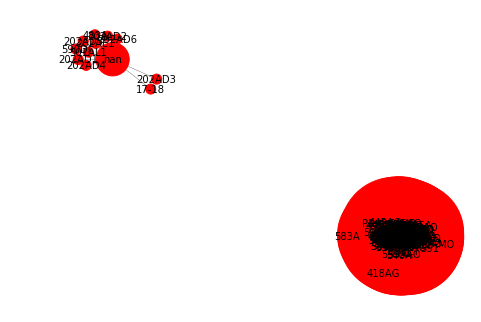

In [134]:
plot_network(G,nx.degree(G),factor=100,font_size=10, node_color="r", width=.25)


In [135]:
### Centrality Measure
from utilities import get_all_node_metrics

cent_measure= {'degree': nx.degree(G),
               'betweenness': nx.betweenness_centrality(G),
               'closeness'  : nx.closeness_centrality(G),
               'eigen_vector': nx.eigenvector_centrality(G)
              }

df_cm = get_all_node_metrics(G)

In [136]:
df_cm.sort_values(by=['degree'],ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
528A,0.863014,0.006441,0.866101,0.111140,0.715556
502AO2,0.842466,0.005782,0.848181,0.109969,0.734906
502AO3,0.842466,0.005782,0.848181,0.109969,0.734906
502AO,0.842466,0.005782,0.848181,0.109969,0.734906
502A,0.842466,0.005782,0.848181,0.109969,0.734906
490TEO,0.842466,0.004359,0.848181,0.110712,0.745302
502C,0.842466,0.005782,0.848181,0.109969,0.734906
502B,0.842466,0.005782,0.848181,0.109969,0.734906
567AO,0.835616,0.005507,0.842372,0.109558,0.741769
490GHU,0.828767,0.009340,0.836642,0.109409,0.752342


In [137]:
df_cm.sort_values(by=['degree'],ascending=True).head(10)

,degree,betweenness,closeness,eigenvector,clustering
17-18,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD4,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD5,0.006849,0.0,0.039465,1.859785e-11,0.0
501AL1,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD1,0.006849,0.0,0.039465,1.859785e-11,0.0
202AE1,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD3,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD2,0.006849,0.0,0.039465,1.859785e-11,0.0
202AD6,0.006849,0.0,0.039465,1.859785e-11,0.0
483A,0.006849,0.0,0.039465,1.859785e-11,0.0


In [138]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 147
Number of edges: 5970
Average degree:  81.2245


In [139]:
graph_df.to_csv("../data/graph_df.csv")

In [140]:
top_10_degree_based_course = df_cm.sort_values(by=['degree'],ascending=False).head(10).index

In [141]:
G_top_10_degree = G = nx.from_pandas_dataframe(graph_df[graph_df['Source'].isin(top_10_degree_based_course)] ,'Source','Target')

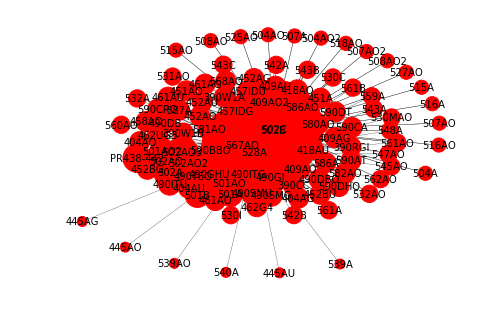

In [142]:
plot_network(G_top_10_degree,nx.degree(G_top_10_degree),factor=100,font_size=10, node_color="r", width=.25)


